#Input files

In [1]:
from __future__ import division
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import mgkit.taxon
from scipy import stats
from __future__ import division
from matplotlib.font_manager import FontProperties
import glob
from time import sleep
import csv
import HTSeq
import mgkit
import mgkit.net.uniprot
import sys
tx = mgkit.taxon.UniprotTaxonomy('../../../../../Hidden_virome/mg_data/taxonomy.pickle')






#Create EC_file

In [2]:
for cfile in glob.glob('./*put*'):
    tophits = {}
    print cfile

./BLAST_genome.ouput
./DIAMOND.output.m8
./RAPSEARCH_genome.output
./SWIPE.output
./USEARCH_genome.output


In [3]:
genes = []
for cfile in glob.glob('./*put*'):
    tophits = {}
    print cfile
    sys.stdout.flush()
    for line in open(cfile,'r'):
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]] 
                    
    for k,v in tophits.iteritems():
        for i in v:
            gene = i[0]
            if gene in genes:
                continue
            else:
                genes.append(gene)
                
print len(genes)

./BLAST_genome.ouput
./DIAMOND.output.m8
./RAPSEARCH_genome.output
./SWIPE.output
./USEARCH_genome.output
432891


In [ ]:
outputting = open('Genes.txt','w')
for i in genes:
    outputting.write(i +'\n')
outputting.close()

In [ ]:
search_file = open('./SWIPE.output','r')
ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


#Top hit per CDS

In [ ]:
tophits = {}
for line in search_file:
    if line.startswith('#'): # Remove metadata
        continue
    else:
        timber = line.split('\t')
        if len(timber) >= 10:
            #print timber
            contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
            #print contig
            gene = timber[1].split('|')[1]
            bitscore = timber[11].replace("\n", "")
            if contig in tophits:
                current_value = tophits[contig]
                gene1 = current_value[0][0]
                wanted1 = current_value[0][1]
                if float(bitscore) > float(wanted1):
                    #print bitscore, wanted
                    tophits[contig] = [[gene,bitscore]]        
                else:
                    current_value.append([gene,bitscore])
                    tophits[contig] = current_value
            else:
                tophits[contig] = [[gene,bitscore]]          

In [ ]:
tophits

#Link ecoli Genes to EC


In [11]:
map_egene_EC = {}

CDS = 0
EC = 0
GENE = 0

for line in open('../../../../../Downloads/sequence.gb','r'):
    timber = line.split(' ')
    #print timber
    try:
        if timber[5] == 'CDS':
            CDS = timber[18].replace('\n','')
        if timber[21].startswith('/EC_number='):
            EC = timber[21].replace('/EC_number=','').replace('"','').replace('\n','')
        if timber[21].startswith('/protein_id='):
            GENE = timber[21].replace('/protein_id=','').replace('"','').replace('\n','')
    except:
        continue
    if CDS != 0:
        if EC != 0:
            if GENE != 0:
                print str(GENE), str(EC)
                map_egene_EC[GENE] = EC
                CDS = 0
                EC = 0
                GENE = 0

 CAV02789.1 1.1.1.3
CAR16143.1 2.7.2.4
CAR16144.1 2.7.1.39
CAR16145.1 4.2.3.1
CAR16148.1 2.2.1.2
CAR16156.1 3.1.6.8
CAR16166.1 2.7.1.26
CAR16167.1 2.7.7.2
CAR16168.1 6.1.1.5
CAR16169.1 3.4.23.36
CAR16170.1 5.2.1.8
CAR16171.1 1.17.1.2
CAR16172.1 3.2.2.-
CAR16173.1 1.17.1.8
CAR16174.1 6.3.5.5
CAR16175.1 6.3.5.5
CAR16177.1 4.2.1.-
CAR16178.1 6.3.2.-
CAR16179.1 2.8.3.-
CAR16180.1 1.3.99.-
CAR16184.1 1.5.5.1
CAR16189.1 1.5.1.3
CAR16192.1 3.6.1.41
CAR16194.1 2.1.1.-
CAR16195.1 1.1.1.262
CAR16196.1 5.2.1.8
CAR16201.1 4.2.1.70
CAR16202.1 3.6.1.-
CAR16203.1 2.7.7.7
CAR16204.1 5.1.3.4
CAR16205.1 5.3.1.4
CAR16206.1 2.7.1.16
CAR16216.1 4.2.1.33
CAR16217.1 4.2.1.33
CAR16218.1 1.1.1.85
CAR16219.1 2.3.3.13
CAR16221.1 2.2.1.6
CAR16222.1 2.2.1.6
CAR16225.1 2.1.1.-
CAR16228.1 6.3.2.13
CAR16229.1 6.3.2.10
CAR16230.1 2.7.8.13
CAR16231.1 6.3.2.9
CAR16233.1 2.4.1.227
CAR16234.1 6.3.2.8
CAR16235.1 6.3.2.4
CAR16239.1 3.5.1.-
CAR16242.1 3.6.1.-
CAR16244.1 2.7.1.24
CAR16245.1 1.7.1.7
CAR16249.1 2.4.2.19
CAR1625

In [5]:
len(map_egene_EC.keys())

1205

In [6]:
map_egene_EC

{'CAR18195.1': '2.3.1.39',
 'CAR17123.1': '2.7.7.22',
 'CAR17353.1': '3.4.21.102',
 'CAR20799.1': '3.1.3.11',
 'CAR18877.1': '1.5.1.34',
 'CAR19116.1': '2.7.7.24',
 'CAR16242.1': '3.6.1.-',
 'CAR20605.1': '1.2.1.2',
 'CAR17555.1': '4.2.99.18',
 'CAR19331.1': '4.2.1.70',
 'CAR20646.1': '3.2.1.22',
 'CAR20016.1': '2.8.1.1',
 'CAR19959.1': '5.2.1.8',
 'CAR19730.1': '2.3.1.54',
 'CAR19162.1': '1.1.1.6',
 'CAR20487.1': '2.7.7.-',
 'CAR18875.1': '2.1.2.1',
 'CAR19826.1': '2.7.1.60',
 'CAR19147.1': '4.3.2.1',
 'CAR16498.1': '3.6.3.17',
 'CAR19340.1': '4.1.2.17',
 'CAR17056.1': '4.1.2.13',
 'CAR17541.1': '1.15.1.1',
 'CAR17125.1': '1.1.1.44',
 'CAR20164.1': '3.2.2.20',
 'CAR20327.1': '4.3.1.18',
 'CAR20566.1': '2.5.1.-',
 'CAR17103.1': '5.4.2.8',
 'CAR19160.1': '2.7.3.9',
 'CAR19150.1': '3.5.1.16',
 'CAR17050.1': '2.7.1.49',
 'CAR19558.1': '2.7.7.43',
 'CAR19957.1': '2.6.1.85',
 'CAR16327.1': '6.4.1.2',
 'CAR18999.1': '6.3.2.2',
 'CAR19009.1': '2.7.1.69',
 'CAR19017.1': '1.18.1.-',
 'CAR20443.

#Map hits to EC

In [7]:
hit_map = {}
for cfile in glob.glob('uniprot-yourlist*'):
    print cfile
    c1 = 0
    for line in open(cfile,'r'):
        c1 +=1
        if c1 >1:
            timber = line.split('\t')
            gene = timber[0]
            EC = timber[15]
            if EC == '':
                continue
            else:
                hit_map[gene] = EC
        else:
            print line.split('\t')
        




uniprot-yourlist%3AM201706258A530B6CA0138AFAA6D2B97CE8C2A924D645EBX.tab
['yourlist:M201706258A530B6CA0138AFAA6D2B97CE8C2A924D645EBX', 'Entry', 'Entry name', 'Protein names', 'Gene names', 'Organism', 'Taxonomic lineage (all)', 'Taxonomic lineage IDs (all)', 'Cross-reference (KO)', 'Cross-reference (eggNOG)', 'Cross-reference (UniPathway)', 'Cross-reference (SignaLink)', 'Cross-reference (BioCyc)', 'Cross-reference (Reactome)', 'Subcellular location [CC]', 'EC number', 'Gene ontology (GO)\n']
uniprot-yourlist%3AM201706258A530B6CA0138AFAA6D2B97CE8C2A924D64611B.tab
['yourlist:M201706258A530B6CA0138AFAA6D2B97CE8C2A924D64611B', 'Entry', 'Entry name', 'Protein names', 'Gene names', 'Organism', 'Taxonomic lineage (all)', 'Taxonomic lineage IDs (all)', 'Cross-reference (KO)', 'Cross-reference (eggNOG)', 'Cross-reference (UniPathway)', 'Cross-reference (SignaLink)', 'Cross-reference (BioCyc)', 'Cross-reference (Reactome)', 'Subcellular location [CC]', 'EC number', 'Gene ontology (GO)\n']


In [ ]:
hit_map

#Map EC to EC

In [12]:
correct = []
total = []
correct_level1 = []
correct_level2 = []
correct_level3 = []
both_last = []

for k,v in tophits.iteritems():
    for i in v:
        try:
            egeneEC = map_egene_EC[k]
            hitEC = hit_map[i[0]]
            pairing = [egeneEC,k]
            if pairing not in total:
                total.append(pairing)
            if egeneEC == hitEC:
                #print 'Y'
                if k in correct:
                    continue
                else:
                    correct.append(k)

                    
                    
                    
                    
                    
            list1 = egeneEC.split('.')
            list2 = hitEC.split('.')
            if list1[0] == list2[0]:
                if k not in correct_level1:
                    correct_level1.append(k)                
                if list1[1] == list2[1]:
                    if k not in correct_level2:
                        correct_level2.append(k)
                    if list1[2] == list2[2]:
                        if k not in correct_level3:
                            correct_level3.append(k)

            if list1[0] == list2[0]:
                if list1[1] == '-' or list2[1] == '-':
                    if k not in both_last:
                        both_last.append(k)
                    #print list1, list2
                if list1[1] == list2[1]:
                    if list1[2] == '-' or list2[2] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[2] == list2[2]:
                        if list1[3] == '-' or list2[3] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[3] == list2[3]:
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                            
                            
        except:
            continue
            
print 'Total matches; ', len(tophits.keys())
print 'Number to divide by; ', len(total)
print 'Totally correct; ', len(correct)
print 'Correct at first level; ', len(correct_level1)
print 'Correct at second level; ', len(correct_level2)
print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
print 'Correct to last common; ', len(both_last)


Total matches;  4415
Number to divide by;  0
Totally correct;  0
Correct at first level;  0
Correct at second level;  0
Correct at third level; 

ZeroDivisionError: float division by zero

#Create profiles

In [10]:
hit_map = {}
for cfile in glob.glob('uniprot-yourlist*'):
    print cfile
    c1 = 0
    for line in open(cfile,'r'):
        c1 +=1
        if c1 >1:
            timber = line.split('\t')
            gene = timber[0]
            EC = timber[15]
            if EC == '':
                continue
            else:
                hit_map[gene] = EC
        else:
            lolp = line.split('\t')
        



        
        
        
All_data = {}

temp = {}
for k,v in map_egene_EC.iteritems():
    splitting = v.split(".")
    try:
        val = str(int(splitting[0])) + '.' + str(int(splitting[1])) + '.-'
        temp[k] = val
    except:
        continue

All_data['True'] = temp


        
for cfile in glob.glob('./BLAST_genome.ouput'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          





    map_egene_EC = {}

    CDS = 0
    EC = 0
    GENE = 0

    for line in open('../../../../../Downloads/sequence.gb','r'):
        timber = line.split(' ')
        #print timber
        try:
            if timber[5] == 'CDS':
                CDS = timber[18].replace('\n','')
            if timber[21].startswith('/EC_number='):
                EC = timber[21].replace('/EC_number=','').replace('"','').replace('\n','')
            if timber[21].startswith('/protein_id='):
                GENE = timber[21].replace('/protein_id=','').replace('"','').replace('\n','')
        except:
            continue
        if CDS != 0:
            if EC != 0:
                if GENE != 0:
                    #print str(GENE), str(EC)
                    map_egene_EC[GENE] = EC
                    CDS = 0
                    EC = 0
                    GENE = 0






    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.' + str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)

    
    
    
      
for cfile in glob.glob('./DIAMOND.output.m8'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          





    map_egene_EC = {}

    CDS = 0
    EC = 0
    GENE = 0

    for line in open('../../../../../Downloads/sequence.gb','r'):
        timber = line.split(' ')
        #print timber
        try:
            if timber[5] == 'CDS':
                CDS = timber[18].replace('\n','')
            if timber[21].startswith('/EC_number='):
                EC = timber[21].replace('/EC_number=','').replace('"','').replace('\n','')
            if timber[21].startswith('/protein_id='):
                GENE = timber[21].replace('/protein_id=','').replace('"','').replace('\n','')
        except:
            continue
        if CDS != 0:
            if EC != 0:
                if GENE != 0:
                    #print str(GENE), str(EC)
                    map_egene_EC[GENE] = EC
                    CDS = 0
                    EC = 0
                    GENE = 0






    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.' + str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)

    
    
    
          
for cfile in glob.glob('./USEARCH_genome.output'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          





    map_egene_EC = {}

    CDS = 0
    EC = 0
    GENE = 0

    for line in open('../../../../../Downloads/sequence.gb','r'):
        timber = line.split(' ')
        #print timber
        try:
            if timber[5] == 'CDS':
                CDS = timber[18].replace('\n','')
            if timber[21].startswith('/EC_number='):
                EC = timber[21].replace('/EC_number=','').replace('"','').replace('\n','')
            if timber[21].startswith('/protein_id='):
                GENE = timber[21].replace('/protein_id=','').replace('"','').replace('\n','')
        except:
            continue
        if CDS != 0:
            if EC != 0:
                if GENE != 0:
                    #print str(GENE), str(EC)
                    map_egene_EC[GENE] = EC
                    CDS = 0
                    EC = 0
                    GENE = 0






    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.' + str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)

    
    
    
          
for cfile in glob.glob('./RAPSEARCH_genome.output'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          





    map_egene_EC = {}

    CDS = 0
    EC = 0
    GENE = 0

    for line in open('../../../../../Downloads/sequence.gb','r'):
        timber = line.split(' ')
        #print timber
        try:
            if timber[5] == 'CDS':
                CDS = timber[18].replace('\n','')
            if timber[21].startswith('/EC_number='):
                EC = timber[21].replace('/EC_number=','').replace('"','').replace('\n','')
            if timber[21].startswith('/protein_id='):
                GENE = timber[21].replace('/protein_id=','').replace('"','').replace('\n','')
        except:
            continue
        if CDS != 0:
            if EC != 0:
                if GENE != 0:
                    #print str(GENE), str(EC)
                    map_egene_EC[GENE] = EC
                    CDS = 0
                    EC = 0
                    GENE = 0






    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.' + str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)

    
    
    
    
      
for cfile in glob.glob('./SWIPE.output'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          





    map_egene_EC = {}

    CDS = 0
    EC = 0
    GENE = 0

    for line in open('../../../../../Downloads/sequence.gb','r'):
        timber = line.split(' ')
        #print timber
        try:
            if timber[5] == 'CDS':
                CDS = timber[18].replace('\n','')
            if timber[21].startswith('/EC_number='):
                EC = timber[21].replace('/EC_number=','').replace('"','').replace('\n','')
            if timber[21].startswith('/protein_id='):
                GENE = timber[21].replace('/protein_id=','').replace('"','').replace('\n','')
        except:
            continue
        if CDS != 0:
            if EC != 0:
                if GENE != 0:
                    #print str(GENE), str(EC)
                    map_egene_EC[GENE] = EC
                    CDS = 0
                    EC = 0
                    GENE = 0






    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.' + str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)


uniprot-yourlist%3AM201706258A530B6CA0138AFAA6D2B97CE8C2A924D645EBX.tab
uniprot-yourlist%3AM201706258A530B6CA0138AFAA6D2B97CE8C2A924D64611B.tab
./BLAST_genome.ouput
Total matches;  4689
Number to divide by;  1052
Totally correct;  144
Correct at second level;  332
Percentage correct at second level;  31.5589353612
Correct at third level;  23.9543726236
Correct to last common;  214
./DIAMOND.output.m8
Total matches;  4281
Number to divide by;  656
Totally correct;  110
Correct at second level;  215
Percentage correct at second level;  32.7743902439
Correct at third level;  27.743902439
Correct to last common;  143
./USEARCH_genome.output
Total matches;  4415
Number to divide by;  735
Totally correct;  131
Correct at second level;  255
Percentage correct at second level;  34.693877551
Correct at third level;  28.2993197279
Correct to last common;  176
./RAPSEARCH_genome.output
Total matches;  4464
Number to divide by;  756
Totally correct;  123
Correct at second level;  240
Percentage co

In [ ]:
All_data['./SWIPE.output']

In [ ]:
all_ecs = []

for k, v in All_data.iteritems():
    print k, len(v.values())
    totals = {}
    for i in v.values():
        if i in totals:
            totals[i] +=1
        else:
            totals[i] = 1
    for l,m in totals.iteritems():
        if l in all_ecs:
            continue
        else:
            all_ecs.append(l)

In [ ]:
all_ecs

['2.1.-',
 '2.2.-',
 '4.6.-',
 '2.9.-',
 '6.1.-',
 '1.1.-',
 '3.1.-',
 '1.8.-',
 '1.7.-',
 '1.9.-',
 '2.8.-',
 '6.4.-',
 '1.6.-',
 '4.1.-',
 '5.5.-',
 '1.14.-',
 '1.97.-',
 '1.12.-',
 '5.3.-',
 '2.5.-',
 '4.4.-',
 '2.4.-',
 '1.2.-',
 '1.13.-',
 '1.3.-',
 '5.2.-',
 '1.5.-',
 '1.20.-',
 '2.3.-',
 '5.4.-',
 '5.99.-',
 '1.18.-',
 '1.4.-',
 '3.7.-',
 '1.17.-',
 '6.3.-',
 '4.3.-',
 '6.2.-',
 '3.6.-',
 '4.2.-',
 '5.1.-',
 '2.7.-',
 '3.5.-',
 '1.10.-',
 '2.6.-',
 '2.10.-',
 '3.2.-',
 '3.4.-',
 '4.99.-',
 '1.11.-',
 '6.5.-',
 '3.3.-',
 '3.9.-',
 '1.21.-',
 '1.23.-',
 '1.16.-',
 '1.15.-']

In [ ]:
Perc_data = {}
for i in all_ecs:
    Perc_data[i] = []


    
('True','BLASTX','DIAMOND','USEARCH','RAPSearch2','SWIPE')

for cfile in ['True', './BLAST_genome.ouput','./DIAMOND.output.m8','./USEARCH_genome.output','./RAPSEARCH_genome.output','./SWIPE.output']:
    v = All_data[cfile]
    k = cfile
    tot = len(v.values())
    totals = {}
    for i in v.values():
        if i in totals:
            totals[i] +=1
        else:
            totals[i] = 1
    temp = {}
    for l,m in Perc_data.iteritems():
        if l in totals:
            perc = (float(totals[l])/tot)*100
            lolp = m
            lolp.append(perc)
            temp[l] = lolp
        else:
            lolp = m
            lolp.append(0.0)
            temp[l] = lolp

    Perc_data = temp


In [ ]:
Perc_data

{'1.1.-': [6.527196652719665,
  3.8095238095238098,
  5.555555555555555,
  4.377564979480164,
  4.533333333333333,
  0.9228187919463088],
 '1.10.-': [0.5857740585774058,
  0.19047619047619047,
  0.7716049382716049,
  0.957592339261286,
  0.8,
  0.08389261744966443],
 '1.11.-': [0.6694560669456067,
  0.6666666666666667,
  0.7716049382716049,
  0.6839945280437756,
  0.6666666666666667,
  0.5033557046979865],
 '1.12.-': [0.6694560669456067,
  0.09523809523809523,
  0.30864197530864196,
  0.27359781121751026,
  0.26666666666666666,
  0.0],
 '1.13.-': [0.08368200836820083,
  0.19047619047619047,
  0.15432098765432098,
  0.27359781121751026,
  0.0,
  0.33557046979865773],
 '1.14.-': [0.7531380753138075,
  1.5238095238095237,
  0.7716049382716049,
  0.957592339261286,
  1.3333333333333335,
  2.7684563758389262],
 '1.15.-': [0.2510460251046025, 0.0, 0.0, 0.0, 0.0, 0.0],
 '1.16.-': [0.08368200836820083, 0.0, 0.0, 0.0, 0.0, 0.0],
 '1.17.-': [0.6694560669456067,
  0.6666666666666667,
  1.08024691

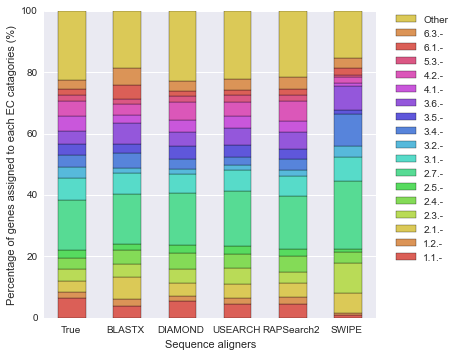

In [ ]:
temp = {}
unknown = [0,0,0,0,0,0]
for k,v in Perc_data.iteritems():
    if sum(v) > 10:
        temp[k.capitalize()] = v
    else:
        t = []
        for i,l in zip(unknown,v):
            t.append(i+l)
        unknown = t

temp['Other'] = unknown

dataframe = pd.DataFrame(temp)
ax = dataframe.plot(kind='bar',stacked=True,legend=True, ylim=(0,100),color=sns.color_palette("hls", 15))

N = 6
ind = np.arange(N)
width = 0.35

    
plt.xlabel('Sequence aligners')
plt.ylabel('Percentage of genes assigned to each EC catagories (%)')
plt.xticks(ind+width/2. - 0.2,('True','BLASTX','DIAMOND','USEARCH','RAPSearch2','SWIPE'),rotation='horizontal')

handles, labels = ax.get_legend_handles_labels()


ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.gcf().subplots_adjust(right=0.7)

plt.savefig('Genome_EC2_analysis.pdf',format='pdf',dpi=1000000000)

#Using gene numbers

In [14]:
hit_map = {}
for cfile in glob.glob('uniprot-yourlist*'):
    print cfile
    c1 = 0
    for line in open(cfile,'r'):
        c1 +=1
        if c1 >1:
            timber = line.split('\t')
            gene = timber[0]
            EC = timber[15]
            if EC == '':
                continue
            else:
                hit_map[gene] = EC
        else:
            lolp = line.split('\t')
        
        
map_egene_EC = {}

CDS = 0
EC = 0
GENE = 0

for line in open('../../../../../Downloads/sequence.gb','r'):
    timber = line.split(' ')
    #print timber
    try:
        if timber[5] == 'CDS':
            CDS = timber[18].replace('\n','')
        if timber[21].startswith('/EC_number='):
            EC = timber[21].replace('/EC_number=','').replace('"','').replace('\n','')
        if timber[21].startswith('/protein_id='):
            GENE = timber[21].replace('/protein_id=','').replace('"','').replace('\n','')
    except:
        continue
    if CDS != 0:
        if EC != 0:
            if GENE != 0:
                #print str(GENE), str(EC)
                map_egene_EC[GENE] = EC
                CDS = 0
                EC = 0
                GENE = 0

uniprot-yourlist%3AM201706258A530B6CA0138AFAA6D2B97CE8C2A924D645EBX.tab
uniprot-yourlist%3AM201706258A530B6CA0138AFAA6D2B97CE8C2A924D64611B.tab


In [15]:
print 'Done'

Done


In [16]:

        
        
        
All_data = {}

temp = {}
for k,v in map_egene_EC.iteritems():
    splitting = v.split(".")
    try:
        val = str(int(splitting[0])) + '.-'# + str(int(splitting[1])) + '.-'
        temp[k] = val
    except:
        continue

All_data['True'] = temp


        
for cfile in glob.glob('./BLAST_genome.ouput'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          










    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.-'# + str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)

    
    
    
      
for cfile in glob.glob('./DIAMOND.output.m8'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          





    map_egene_EC = {}

    CDS = 0
    EC = 0
    GENE = 0

    for line in open('../../../../../Downloads/sequence.gb','r'):
        timber = line.split(' ')
        #print timber
        try:
            if timber[5] == 'CDS':
                CDS = timber[18].replace('\n','')
            if timber[21].startswith('/EC_number='):
                EC = timber[21].replace('/EC_number=','').replace('"','').replace('\n','')
            if timber[21].startswith('/protein_id='):
                GENE = timber[21].replace('/protein_id=','').replace('"','').replace('\n','')
        except:
            continue
        if CDS != 0:
            if EC != 0:
                if GENE != 0:
                    #print str(GENE), str(EC)
                    map_egene_EC[GENE] = EC
                    CDS = 0
                    EC = 0
                    GENE = 0






    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.-'# + str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)

    
    
    
          
for cfile in glob.glob('./USEARCH_genome.output'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          





    map_egene_EC = {}

    CDS = 0
    EC = 0
    GENE = 0

    for line in open('../../../../../Downloads/sequence.gb','r'):
        timber = line.split(' ')
        #print timber
        try:
            if timber[5] == 'CDS':
                CDS = timber[18].replace('\n','')
            if timber[21].startswith('/EC_number='):
                EC = timber[21].replace('/EC_number=','').replace('"','').replace('\n','')
            if timber[21].startswith('/protein_id='):
                GENE = timber[21].replace('/protein_id=','').replace('"','').replace('\n','')
        except:
            continue
        if CDS != 0:
            if EC != 0:
                if GENE != 0:
                    #print str(GENE), str(EC)
                    map_egene_EC[GENE] = EC
                    CDS = 0
                    EC = 0
                    GENE = 0






    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.-' #+ str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)

    
    
    
          
for cfile in glob.glob('./RAPSEARCH_genome.output'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          









    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.-'# + str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)

    
    
    
    
      
for cfile in glob.glob('./SWIPE.output'):
    search_file = open(cfile,'r')
    print cfile
    ecoli_file = HTSeq.FastaReader('../Against_Ecoli_proteins_only/Files/Ecoli_Nucleotide.txt')


    tophits = {}
    for line in search_file:
        if line.startswith('#'): # Remove metadata
            continue
        else:
            timber = line.split('\t')
            if len(timber) >= 10:
                #print timber
                contig = timber[0].split('|')[1].split('_cds_')[1].split('_')[0]
                #print contig
                gene = timber[1].split('|')[1]
                bitscore = timber[11].replace("\n", "")
                if contig in tophits:
                    current_value = tophits[contig]
                    gene1 = current_value[0][0]
                    wanted1 = current_value[0][1]
                    if float(bitscore) > float(wanted1):
                        #print bitscore, wanted
                        tophits[contig] = [[gene,bitscore]]        
                    else:
                        current_value.append([gene,bitscore])
                        tophits[contig] = current_value
                else:
                    tophits[contig] = [[gene,bitscore]]          












    correct = []
    total = []
    correct_level2 = []
    correct_level3 = []
    both_last = []

    second_db = {}


    for k,v in tophits.iteritems():
        for i in v:
            try:
                egeneEC = map_egene_EC[k]
                hitEC = hit_map[i[0]]
                pairing = [egeneEC,k]
                if pairing not in total:
                    total.append(pairing)
                if egeneEC == hitEC:
                    #print 'Y'
                    if k in correct:
                        continue
                    else:
                        correct.append(k)






                list1 = egeneEC.split('.')
                list2 = hitEC.split('.')
                try:
                    second_db[k] = str(int(list2[0])) + '.-' #+ str(int(list2[1])) + '.-'
                except:
                    continue
                if list1[0] == list2[0]:
                    if list1[1] == list2[1]:
                        if k not in correct_level2:
                            correct_level2.append(k)
                        if list1[2] == list2[2]:
                            if k not in correct_level3:
                                correct_level3.append(k)

                if list1[0] == list2[0]:
                    if list1[1] == '-' or list2[1] == '-':
                        if k not in both_last:
                            both_last.append(k)
                        #print list1, list2
                    if list1[1] == list2[1]:
                        if list1[2] == '-' or list2[2] == '-':
                            if k not in both_last:
                                both_last.append(k)
                            #print list1, list2
                        if list1[2] == list2[2]:
                            if list1[3] == '-' or list2[3] == '-':
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2
                            if list1[3] == list2[3]:
                                if k not in both_last:
                                    both_last.append(k)
                                #print list1, list2


            except:
                continue

    All_data[cfile] = second_db

    print 'Total matches; ', len(tophits.keys())
    print 'Number to divide by; ', len(total)
    print 'Totally correct; ', len(correct)
    print 'Correct at second level; ', len(correct_level2)
    print 'Percentage correct at second level; ', (float(len(correct_level2))/len(total))*100
    print 'Correct at third level; ', (float(len(correct_level3))/len(total))*100
    print 'Correct to last common; ', len(both_last)


./BLAST_genome.ouput
Total matches;  4689
Number to divide by;  1052
Totally correct;  144
Correct at second level;  334
Percentage correct at second level;  31.7490494297
Correct at third level;  24.144486692
Correct to last common;  232
./DIAMOND.output.m8
Total matches;  4281
Number to divide by;  656
Totally correct;  110
Correct at second level;  216
Percentage correct at second level;  32.9268292683
Correct at third level;  27.8963414634
Correct to last common;  155
./USEARCH_genome.output
Total matches;  4415
Number to divide by;  735
Totally correct;  131
Correct at second level;  256
Percentage correct at second level;  34.8299319728
Correct at third level;  28.4353741497
Correct to last common;  191
./RAPSEARCH_genome.output
Total matches;  4464
Number to divide by;  756
Totally correct;  123
Correct at second level;  241
Percentage correct at second level;  31.8783068783
Correct at third level;  26.5873015873
Correct to last common;  183
./SWIPE.output
Total matches;  4718
N

In [17]:
print 'Done'

Done


In [ ]:
all_ecs = []
allecs = {}

for k, v in All_data.iteritems():
    print k, len(v.values())
    totals = {}
    for i in v.values():
        if i in totals:
            totals[i] +=1
        else:
            totals[i] = 1
    allecs[k] = totals
    for l,m in totals.iteritems():
        if l in all_ecs:
            continue
        else:
            all_ecs.append(l)

In [ ]:
allecs

In [ ]:
#Quick output raw information for Excel to create a table

outputting = open('Raw_gene_EC_counts.csv','w')

outputting.write('EC,Original,Blast,Diamond,Usearch,Rapsearch2,SWIPE\n')


EC_to_name = {
    '1.-': 'Oxidoreductases',
    '2.-': 'Transferases',
    '3.-': 'Hydrolases',
    '4.-': 'Lysases',
    '5.-': 'Isomerases',
    '6.-': 'Ligases',    
}



            
for ec in ['1.-','2.-','3.-','4.-','5.-','6.-']:
        blastk = allecs['./BLAST_genome.ouput'][ec]
        diamondk = allecs['./DIAMOND.output.m8'][ec]
        usearchk = allecs['./USEARCH_genome.output'][ec]
        rapk = allecs['./RAPSEARCH_genome.output'][ec]
        swipek = allecs['./SWIPE.output'][ec]
        truek = allecs['True'][ec]
        outputting.write(EC_to_name[ec] + ',' + str(truek) + ',' + str(blastk)  + ',' + str(diamondk)  + ',' + str(usearchk) + ',' + str(rapk)  + ',' + str(swipek) + '\n')

outputting.close()

In [ ]:
Perc_data = {}
for i in all_ecs:
    Perc_data[i] = []


    
('True','BLASTX','DIAMOND','USEARCH','RAPSearch2','SWIPE')

for cfile in ['True', './BLAST_genome.ouput','./DIAMOND.output.m8','./USEARCH_genome.output','./RAPSEARCH_genome.output','./SWIPE.output']:
    v = All_data[cfile]
    k = cfile
    tot = len(v.values())
    totals = {}
    for i in v.values():
        if i in totals:
            totals[i] +=1
        else:
            totals[i] = 1
    temp = {}
    for l,m in Perc_data.iteritems():
        if l in totals:
            perc = (float(totals[l])/tot)*100
            lolp = m
            lolp.append(perc)
            temp[l] = lolp
        else:
            lolp = m
            lolp.append(0.0)
            temp[l] = lolp

    Perc_data = temp


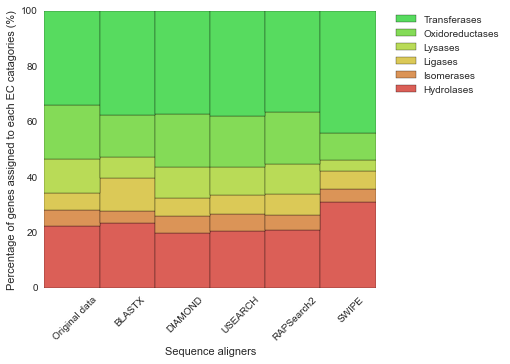

In [ ]:
temp = {}

EC_to_name = {
    '1.-': 'Oxidoreductases',
    '2.-': 'Transferases',
    '3.-': 'Hydrolases',
    '4.-': 'Lysases',
    '5.-': 'Isomerases',
    '6.-': 'Ligases',    
}

for k,v in Perc_data.iteritems():
    temp[EC_to_name[k]] = v


dataframe = pd.DataFrame(temp)
ax = dataframe.plot(kind='bar',stacked=True,legend=True, ylim=(0,100),color=sns.color_palette("hls", 15), width=1)

N = 6
ind = np.arange(N)
width = 0.1

    
plt.xlabel('Sequence aligners')
plt.ylabel('Percentage of genes assigned to each EC catagories (%)')
plt.xticks(ind+width/2 - 0.5,('Original data','BLASTX','DIAMOND','USEARCH','RAPSearch2','SWIPE'),rotation=45)

handles, labels = ax.get_legend_handles_labels()


ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.gcf().subplots_adjust(right=0.7, bottom=0.2)
plt.autoscale()
plt.ylim(0,100)

plt.savefig('Genome_EC1_analysis.pdf',format='pdf',dpi=1000000000)

In [ ]:
import scipy

obs2 = []
obs = {}
for k,v in Perc_data.iteritems():
    try:
        one = v[0]
    except:
        one = 0
        
    try:
        two = v[5]
    except:
        two = 0
    obs[i] = [one,two]
    obs2.append([one,two])
 
#print scipy.stats.chi2_contingency(obs, correction=True)

chi2, p, dof, ex = scipy.stats.chi2_contingency(obs2, correction=True)

print 'Chi2 = ' + str(chi2)
print 'P-value = ' + str(p)   



Chi2 = 10.0320657563
P-value = 0.074331758934


#Create table of misidentification

In [ ]:
All_data

In [ ]:
All_data.keys()

['./USEARCH_genome.output',
 './SWIPE.output',
 './RAPSEARCH_genome.output',
 './DIAMOND.output.m8',
 './BLAST_genome.ouput',
 'True']

In [ ]:
outputting = open('Identfiications_EC_Genes.csv','w')
count = 0
outputting.write('Gene_ID,Original,BlastX,Usearch,Rapsearch2,DIAMOND,SWIPE\n')

unique_list = []

for k,v in All_data.iteritems():
    for h,j in v.iteritems():
        if h in unique_list:
            continue
        else:
            unique_list.append(h)

for k in unique_list:
    try:
        blas = All_data['./BLAST_genome.ouput'][k]
        usea = All_data['./USEARCH_genome.output'][k]
        rappy = All_data['./RAPSEARCH_genome.output'][k]
        dimonda = All_data['./DIAMOND.output.m8'][k]
        swipe = All_data['./SWIPE.output'][k]
        trutru = All_data['True'][k]
        outputting.write(k + ',' + str(trutru)+ ',' + str(blas) + ',' + str(usea) + ',' + str(rappy) + ',' + str(dimonda) + ',' + str(swipe) + '\n' )
        count +=1
        
    except:
        try:
            try:
                trutru = All_data['True'][k]
            except:
                trutru = '-'
            try:
                blas = All_data['./BLAST_genome.ouput'][k]
            except:
                blas = '-'
            try:
                usea = All_data['./USEARCH_genome.output'][k]
            except:
                usea = '-'
            try:
                rappy = All_data['./RAPSEARCH_genome.output'][k]
            except:
                rappy = '-'
            try:
                dimonda = All_data['./DIAMOND.output.m8'][k]
            except:
                dimonda = '-'
            try:
                swipe = All_data['./SWIPE.output'][k]
            except:
                swipe = '-'
            outputting.write(k + ',' + str(trutru) + ','  + str(blas) + ',' + str(usea) + ',' + str(rappy) + ',' + str(dimonda) + ',' + str(swipe) + '\n' )
            count +=1
        except:
            continue
            
outputting.close()
    

In [ ]:
print count

1205


In [ ]:
#Misidentified

match = 0
mismatch = 0
total = 0
for k,v in All_data['True'].iteritems():
    total +=1
    try:
        swipe = All_data['./SWIPE.output'][k]
        if swipe == v:
            match +=1
        else:
            mismatch +=1
    except:
        continue
        
        
print match
print mismatch
print total

284
908
1205


In [ ]:
len(All_data['./SWIPE.output'].keys())

1192

In [ ]:
1205 - len(All_data['./SWIPE.output'].keys())

13

#Venn diagram

In [80]:
listing = []
count = 0

unique_list = []

for k,v in All_data.iteritems():
    for h,j in v.iteritems():
        if h in unique_list:
            continue
        else:
            unique_list.append(h)

for k in unique_list:
    try:
        blas = All_data['./BLAST_genome.ouput'][k]
        usea = All_data['./USEARCH_genome.output'][k]
        rappy = All_data['./RAPSEARCH_genome.output'][k]
        dimonda = All_data['./DIAMOND.output.m8'][k]
        swipe = All_data['./SWIPE.output'][k]
        trutru = All_data['True'][k]
        #print k + ',' + trutru + ',' + dimonda
        count +=1
        
    except:
        try:
            try:
                trutru = All_data['True'][k]
            except:
                trutru = '-'
            try:
                blas = All_data['./BLAST_genome.ouput'][k]
            except:
                blas = '-'
            try:
                usea = All_data['./USEARCH_genome.output'][k]
            except:
                usea = '-'
            try:
                rappy = All_data['./RAPSEARCH_genome.output'][k]
            except:
                rappy = '-'
            try:
                dimonda = All_data['./DIAMOND.output.m8'][k]
            except:
                dimonda = '-'
            try:
                swipe = All_data['./SWIPE.output'][k]
            except:
                swipe = '-'
                
            if dimonda == '-':
                continue
            else:
                if trutru == '2.-':
                    print k + ',' + trutru + ',' + dimonda

            count +=1
        except:
            continue
            
    

CAR17102.1,2.-,2.-
